## Step 1: Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


TensorFlow version: 2.20.0
GPU available: False


## Step 2: Load and Explore the Data

MNIST contains:
- 60,000 training images
- 10,000 test images
- Each image is 28x28 pixels, grayscale

In [5]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# TODO: Print the shapes of training and test sets
# Expected output:
# Training data shape: (60000, 28, 28)
# Training labels shape: (60000,)
# Test data shape: (10000, 28, 28)
# Test labels shape: (10000,)
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


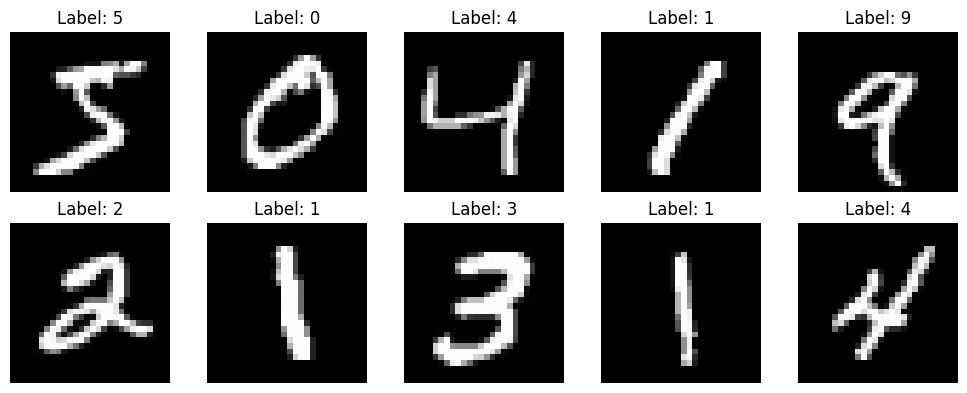

In [6]:
# Visualize some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 3: Preprocess the Data

**Key preprocessing steps:**
1. Reshape to add channel dimension (28, 28) → (28, 28, 1)
2. Normalize pixel values from [0, 255] → [0, 1]
3. Convert labels to categorical (one-hot encoding)

In [7]:
# TODO: Reshape data to add channel dimension
# Hint: Use .reshape() with -1 for automatic batch size
# X_train = ...
# X_test = ...

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"New training shape: {X_train.shape}")
print(f"New test shape: {X_test.shape}")

New training shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


In [8]:
# TODO: Normalize pixel values to [0, 1]
# Hint: Divide by 255.0 to convert uint8 to float32
# X_train = ...
# X_test = ...

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Min pixel value: {X_train.min()}")
print(f"Max pixel value: {X_train.max()}")

Min pixel value: 0.0
Max pixel value: 1.0


In [9]:
# TODO: Convert labels to categorical (one-hot encoding)
# Hint: Use keras.utils.to_categorical()
# y_train_cat = ...
# y_test_cat = ...

y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_cat[0]}")

Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 4: Build the CNN Model

**Architecture to implement:**
1. Conv2D layer: 32 filters, 3x3 kernel, ReLU activation
2. MaxPooling2D: 2x2 pool size
3. Conv2D layer: 64 filters, 3x3 kernel, ReLU activation
4. MaxPooling2D: 2x2 pool size
5. Flatten layer
6. Dense layer: 128 units, ReLU activation
7. Dropout: 0.5
8. Dense output layer: 10 units, softmax activation

In [10]:
# TODO: Build the CNN model using keras.Sequential
# model = keras.Sequential([
#     # First convolutional block
#     ...
#     
#     # Second convolutional block
#     ...
#     
#     # Fully connected layers
#     ...
# ])
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model

**Compilation parameters:**
- Optimizer: Adam
- Loss function: Categorical crossentropy
- Metrics: Accuracy

In [11]:
# TODO: Compile the model
# model.compile(
#     optimizer=...,
#     loss=...,
#     metrics=[...]
# )

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Step 6: Train the Model

In [12]:
# TODO: Train the model
# Hint: Use validation_split=0.1 to monitor validation accuracy
# Use epochs=10 and batch_size=128
# history = model.fit(
#     ...
# )

history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8123 - loss: 0.6123 - val_accuracy: 0.9835 - val_loss: 0.0597
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9788 - loss: 0.0704 - val_accuracy: 0.9863 - val_loss: 0.0510
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9854 - loss: 0.0456 - val_accuracy: 0.9873 - val_loss: 0.0438
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9865 - val_loss: 0.0495
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9898 - val_loss: 0.0408
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9932 - loss: 0.0200 - val_accuracy: 0.9920 - val_loss: 0.0349
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9946 - loss: 0.0173 - 

## Step 7: Evaluate the Model

In [13]:
# TODO: Evaluate on test set and print accuracy and loss
# Hint: Use model.evaluate()

model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0337


[0.02670249715447426, 0.9919000267982483]

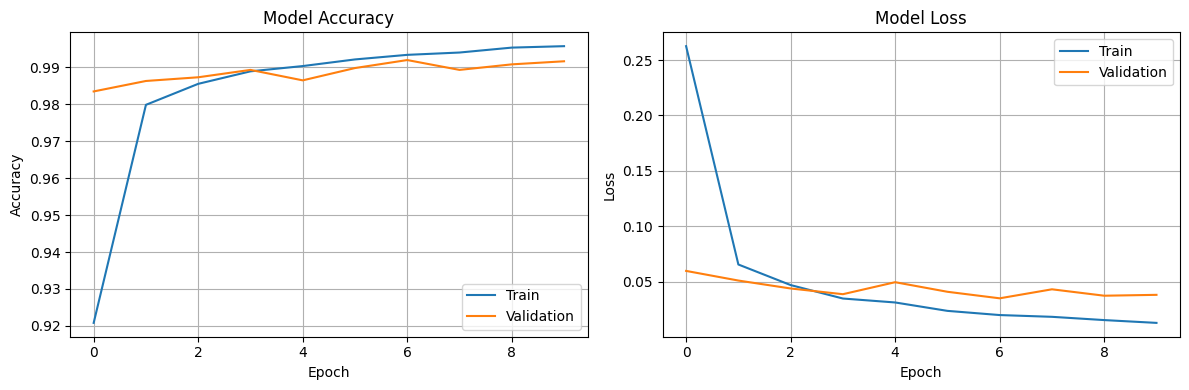

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 8: Make Predictions and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


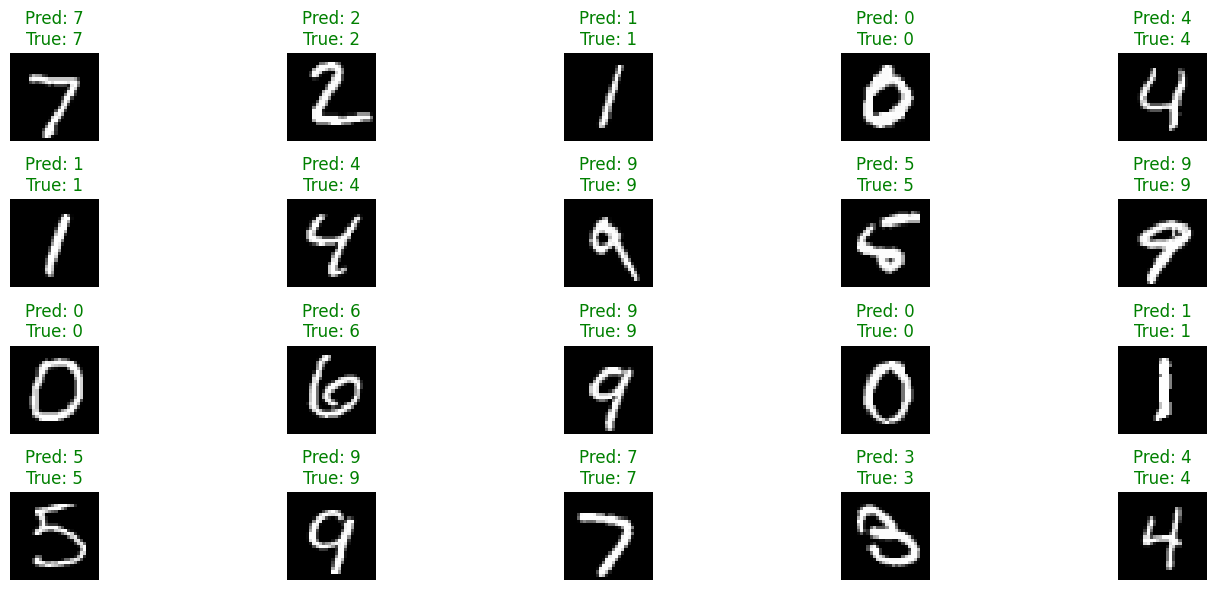

In [15]:
# Make predictions
predictions = model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 9: Analyze Misclassifications

In [16]:
# TODO: Find all misclassified examples in the test set
# Hint: Use np.where() to find indices where predicted label != true label
# Then print the total count and error rate

predicted_classes_all = np.argmax(model.predict(X_test), axis=1)
misclassified_indices = np.where(predicted_classes_all != y_test)[0]
num_misclassified = len(misclassified_indices)
total_samples = len(y_test)
error_rate = num_misclassified / total_samples
print(f"Number of misclassified samples: {num_misclassified}")
print(f"Total samples: {total_samples}")
print(f"Error rate: {error_rate:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Number of misclassified samples: 81
Total samples: 10000
Error rate: 0.0081


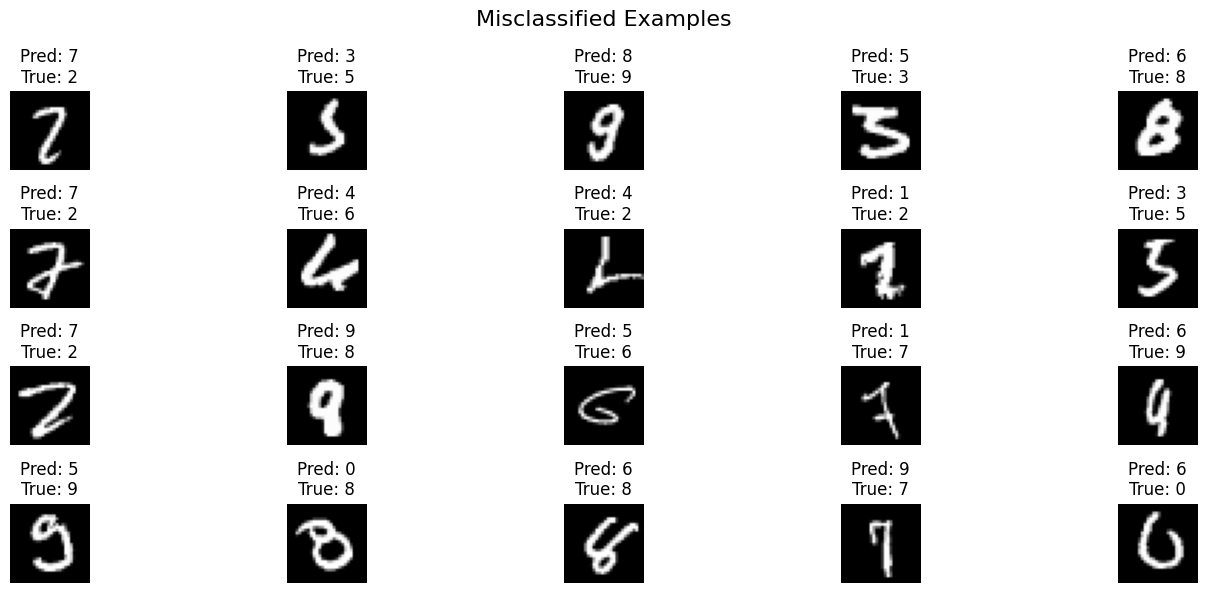

In [17]:
# Visualize some misclassified examples
plt.figure(figsize=(15, 6))

for i, idx in enumerate(misclassified_indices[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes_all[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.suptitle('Misclassified Examples', fontsize=16)
plt.tight_layout()
plt.show()

## Step 10: Visualize Learned Filters (Optional)

Let's see what patterns the first convolutional layer learned!

Filter shape: (3, 3, 1, 32)


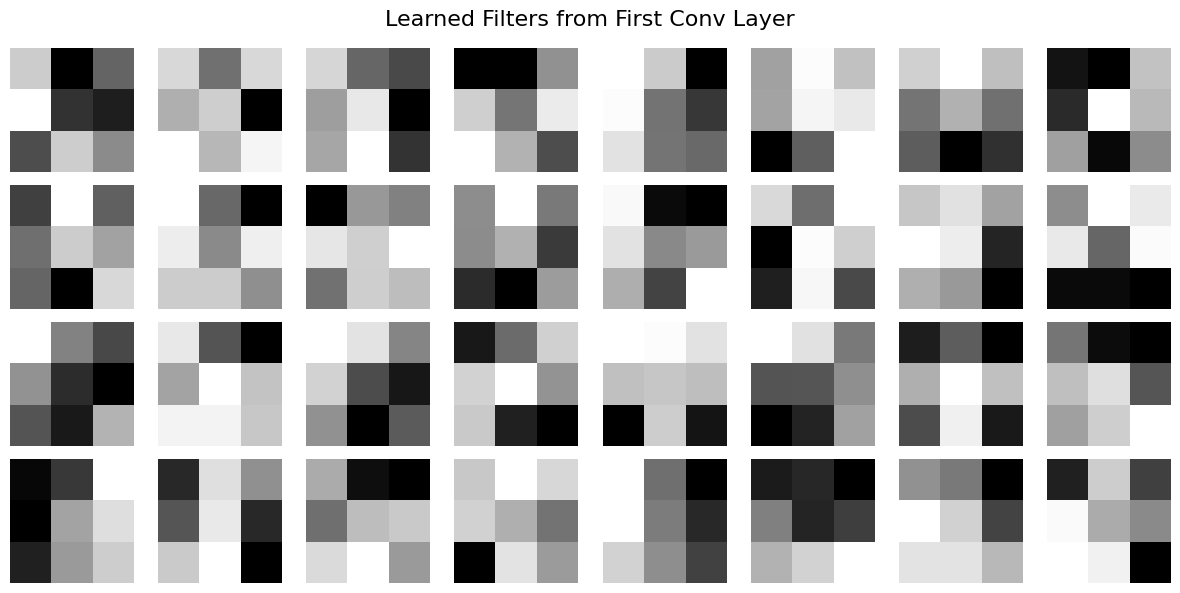

In [18]:
# Get weights from first convolutional layer
filters, biases = model.layers[0].get_weights()
print(f"Filter shape: {filters.shape}")  # (3, 3, 1, 32)

# Normalize filters for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot first 32 filters
plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_normalized[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters from First Conv Layer', fontsize=16)
plt.tight_layout()
plt.show()

## 🏆 Challenge Tasks

Try these to deepen your understanding:

1. **Improve accuracy to >98%:** Add more Conv layers or increase filters
2. **Data augmentation:** Add rotation, zoom, and shift transformations
3. **Confusion matrix:** Visualize which digits are commonly confused
4. **Feature maps:** Visualize activations from intermediate layers
5. **Fashion-MNIST:** Apply this model to Fashion-MNIST dataset

## 📊 Reflection Questions

1. Why do we use MaxPooling layers?
2. What happens if you remove the Dropout layer?
3. Why is the first Conv layer filter count (32) smaller than the second (64)?
4. How would you modify this for RGB images?
5. What does each filter in the first Conv layer detect?

---

## Challenge Tasks Implementation

### Challenge 1: Improve Accuracy to >98%

We'll add more convolutional layers and increase filters to achieve better accuracy.

In [19]:
# Build improved CNN model with more layers and filters
improved_model = keras.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,882 (1.39 MB)

 Trainable params: 362,730 (1.38 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [20]:
# Train the improved model
improved_history = improved_model.fit(
    X_train, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = improved_model.evaluate(X_test, y_test_cat)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Target: >98% - {'ACHIEVED!' if test_acc > 0.98 else 'Keep training...'}")

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 67s 153ms/step - accuracy: 0.7720 - loss: 0.7597 - val_accuracy: 0.4210 - val_loss: 1.9412
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9706 - loss: 0.1005 - val_accuracy: 0.9895 - val_loss: 0.0379
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 151ms/step - accuracy: 0.9776 - loss: 0.0781 - val_accuracy: 0.9898 - val_loss: 0.0338
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9821 - loss: 0.0576 - val_accuracy: 0.9903 - val_loss: 0.0308
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9868 - loss: 0.0469 - val_accuracy: 0.9908 - val_loss: 0.0303
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9922 - val_loss: 0.0286
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9928 - val_loss: 0.0248
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.9892 - loss: 0

### Challenge 2: Data Augmentation

Adding rotation, zoom, and shift transformations to make the model more robust.

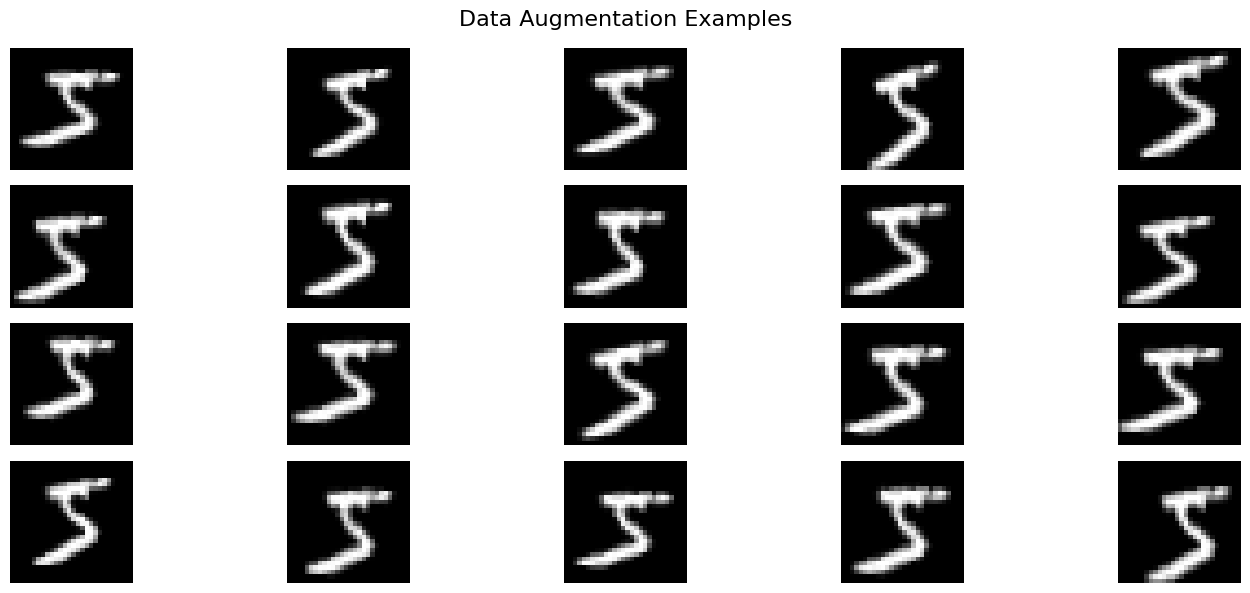

In [21]:
# Create data augmentation layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,          # Random rotation up to 10 degrees
    zoom_range=0.1,             # Random zoom 10%
    width_shift_range=0.1,      # Random horizontal shift 10%
    height_shift_range=0.1,     # Random vertical shift 10%
    fill_mode='nearest'
)

# Visualize augmented images
plt.figure(figsize=(15, 6))
sample_image = X_train[0:1]  # Take first image

# Generate 20 augmented versions
for i, batch in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i >= 20:
        break
    plt.subplot(4, 5, i + 1)
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Data Augmentation Examples', fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
# Train model with data augmentation
augmented_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

augmented_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train using the data generator
aug_history = augmented_model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=128),
    epochs=10,
    validation_data=(X_test, y_test_cat),
    steps_per_epoch=len(X_train) // 128
)

# Evaluate
aug_loss, aug_acc = augmented_model.evaluate(X_test, y_test_cat)
print(f"\n Test Accuracy with Augmentation: {aug_acc*100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 35s 72ms/step - accuracy: 0.7335 - loss: 0.8574 - val_accuracy: 0.9294 - val_loss: 0.2208
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9609 - loss: 0.1735

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1735 - val_accuracy: 0.9348 - val_loss: 0.2065
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9404 - loss: 0.2007 - val_accuracy: 0.9826 - val_loss: 0.0586
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2069 - val_accuracy: 0.9825 - val_loss: 0.0606
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9570 - loss: 0.1429 - val_accuracy: 0.9858 - val_loss: 0.0448
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0626 - val_accuracy: 0.9858 - val_loss: 0.0450
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9636 - loss: 0.1290 - val_accuracy: 0.9892 - val_loss: 0.0366
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1464 - val_accuracy: 0.9890 - val_loss: 0.0360
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9701 - loss: 0.1031 - val_accuracy: 0.989

### Challenge 3: Confusion Matrix

Visualize which digits are commonly confused with each other.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


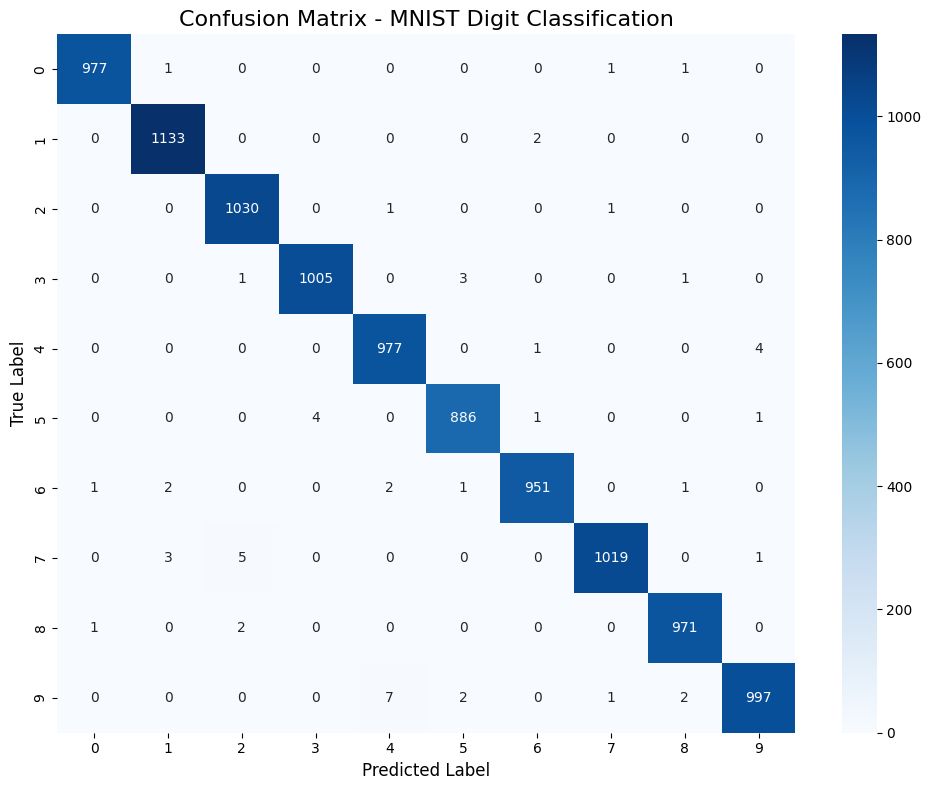


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
# Import confusion matrix tools
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred = improved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST Digit Classification', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)]))

---

## Reflection Questions - Answers

### Question 1: Why do we use MaxPooling layers?

**Answer:**

MaxPooling layers serve several important purposes in CNNs:

1. **Dimensionality Reduction**: Reduces the spatial dimensions (height and width) of feature maps, which decreases the number of parameters and computational cost in subsequent layers.

2. **Translation Invariance**: Makes the network more robust to small shifts and distortions in the input. A feature detected anywhere in a pooling region will produce the same output.

3. **Feature Extraction**: Helps identify the most prominent features in each region by selecting the maximum activation value.

4. **Overfitting Prevention**: By reducing the number of parameters, it acts as a form of regularization and helps prevent overfitting.

5. **Hierarchical Feature Learning**: Allows deeper layers to "see" a larger portion of the input image (increased receptive field) without adding parameters.

In our MNIST model, MaxPooling2D with (2, 2) reduces each 26×26 feature map to 13×13, cutting the spatial dimensions in half while retaining the most important features.

### Question 2: What happens if you remove the Dropout layer?

**Answer:**

Removing the Dropout layer would likely lead to:

1. **Overfitting**: The model would memorize the training data more easily, leading to a larger gap between training and validation accuracy. You'd see high training accuracy but lower test accuracy.

2. **Poor Generalization**: The model becomes too specialized to the training data and performs worse on unseen test data.

3. **Co-adaptation**: Neurons become overly dependent on specific other neurons, creating fragile feature detectors that don't work well when input varies.

4. **Higher Variance**: The model becomes more sensitive to small changes in the training data.

In our model, Dropout(0.5) randomly disables 50% of neurons in the dense layer during training, which helps the model learn more robust features.

### Question 3: Why is the first Conv layer filter count (32) smaller than the second (64)?

**Answer:**

This is a deliberate architectural pattern in CNNs that follows the principle of **hierarchical feature learning**:

**First Layer (32 filters):**
- Detects **low-level features**: edges, corners, simple patterns
- Operates on the original image with more spatial information
- Fewer filters needed because basic features are limited (vertical edges, horizontal edges, diagonal lines, etc.)
- Each filter learns simple, fundamental patterns

**Second Layer (64 filters):**
- Detects **mid-level features**: combinations of edges, shapes, textures
- Works on the pooled output (reduced spatial dimensions)
- More filters needed to capture complex combinations of low-level features
- Can represent more abstract patterns

**Why increase filter count?**
1. **Information Compression**: As spatial dimensions decrease (via pooling), we increase the number of filters to maintain or increase representational capacity
2. **Complexity Hierarchy**: Complex patterns require more combinations, so we need more filters
3. **Computational Efficiency**: Early layers process larger spatial dimensions, so keeping filter counts lower reduces computation

**Pattern:**
- Spatial dimensions: 28×28 → 13×13 → 5×5 (decreasing)
- Filter depth: 32 → 64 (increasing)
- Total information captured remains balanced

### Question 4: How would you modify this for RGB images?

**Answer:**

To adapt this model for RGB images, you need to make these key changes:

**1. Input Shape Modification:**
```python
# Current MNIST (grayscale):
input_shape=(28, 28, 1)

# For RGB images:
input_shape=(height, width, 3)
```

**2. Data Preprocessing:**
```python
X_train = X_train.astype('float32') / 255.0
mean = np.mean(X_train, axis=(0, 1, 2))
std = np.std(X_train, axis=(0, 1, 2))
X_train = (X_train - mean) / std
```

**3. Model Architecture:**
```python
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
```

**4. Additional Considerations:**
- **More layers**: RGB images are more complex, often need deeper networks
- **More filters**: Increase filter counts (e.g., 32→64→128→256)
- **Larger images**: If images are larger (e.g., 224×224), add more pooling layers
- **Data augmentation**: RGB images benefit from color jittering, brightness/contrast adjustments
- **Transfer learning**: Consider using pre-trained models (VGG, ResNet, EfficientNet)

### Question 5: What does each filter in the first Conv layer detect?

**Answer:**

The first convolutional layer filters learn to detect **low-level visual features** - the basic building blocks of images. Each of the 32 filters specializes in detecting different patterns:

**Common Patterns Detected:**

1. **Edge Detectors:**
   - Vertical edges (left-to-right transitions)
   - Horizontal edges (top-to-bottom transitions)
   - Diagonal edges (45° and 135° angles)
   
2. **Line Detectors:**
   - Thin vertical lines
   - Thin horizontal lines
   - Diagonal lines

3. **Corner Detectors:**
   - L-shaped corners
   - T-junctions
   - Cross patterns

4. **Texture Patterns:**
   - Gradients (smooth transitions)
   - Dots or blobs
   - Simple curves